<a href="https://colab.research.google.com/github/KDOXG/Inteligencia-Artificial/blob/master/CIFAR10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR10 Convolutional Neural Network**


<img src="https://i2.wp.com/appliedmachinelearning.blog/wp-content/uploads/2018/03/cifar2.jpg?fit=427%2C325&ssl=1" width="350" />

[Dataset link](https://www.cs.toronto.edu/~kriz/cifar.html)

In [0]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [0]:
print(torch.__version__)

1.3.0+cu100


In [0]:
BATCH_SIZE = 32

transform=transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=BATCH_SIZE)

test_loader = DataLoader(dataset=dataset_test, shuffle=True, batch_size=BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
print(dataset_train)
print(dataset_test)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               ToTensor()
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               ToTensor()
           )


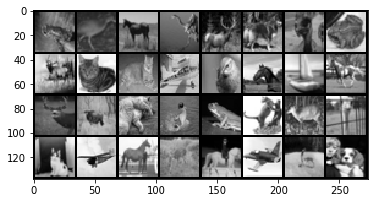

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

In [0]:
for images, labels in train_loader:
    print("Image batch dimensions:", images.shape)
    print("Image label dimensions:", labels.shape)
    break

Image batch dimensions: torch.Size([32, 1, 32, 32])
Image label dimensions: torch.Size([32])


In [0]:
class CNN(nn.Module):
    def __init__(self):
        # to do
        
    def forward(self, x):
        # to do

In [0]:
## test the model with 1 batch
model = CNN()
for images, labels in train_loader:
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: torch.Size([32, 1, 32, 32])
torch.Size([32, 10])


In [0]:
model = CNN()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(model)

CNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv1_bn): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2_bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=125, bias=True)
  (fc2): Linear(in_features=125, out_features=90, bias=True)
  (fc3): Linear(in_features=90, out_features=10, bias=True)
  (activation_function): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)


In [0]:
learning_rate = 0.001
epochs = 15

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

In [0]:
train_losses = []
running_losses_list = []
train_accuracy_list = []

for epoch in range(epochs):
    i = 0
    running_loss = 0.0
    accuracy = 0.0
    total = 0
    correct = 0

    model.train()
    
    for images, labels in train_loader:
        # to do
    
    # to do

    print("Epoch: %5d \t Loss: %.5f \t Accuracy: %.5f" %(epoch+1, running_loss, accuracy))

Epoch:     1 	 Loss: 3038.29120 	 Accuracy: 0.29946
Epoch:     2 	 Loss: 2312.21215 	 Accuracy: 0.47694
Epoch:     3 	 Loss: 2056.08727 	 Accuracy: 0.53842
Epoch:     4 	 Loss: 1915.67416 	 Accuracy: 0.57200
Epoch:     5 	 Loss: 1802.84247 	 Accuracy: 0.59570
Epoch:     6 	 Loss: 1716.01076 	 Accuracy: 0.61272
Epoch:     7 	 Loss: 1631.04128 	 Accuracy: 0.63308
Epoch:     8 	 Loss: 1552.43869 	 Accuracy: 0.65338
Epoch:     9 	 Loss: 1487.76131 	 Accuracy: 0.66668
Epoch:    10 	 Loss: 1420.25021 	 Accuracy: 0.68244
Epoch:    11 	 Loss: 1370.53758 	 Accuracy: 0.69464
Epoch:    12 	 Loss: 1320.71943 	 Accuracy: 0.70538
Epoch:    13 	 Loss: 1276.40753 	 Accuracy: 0.71280
Epoch:    14 	 Loss: 1227.93652 	 Accuracy: 0.72450
Epoch:    15 	 Loss: 1189.38378 	 Accuracy: 0.73342


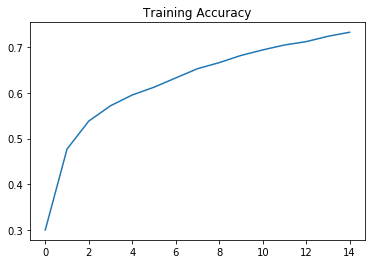

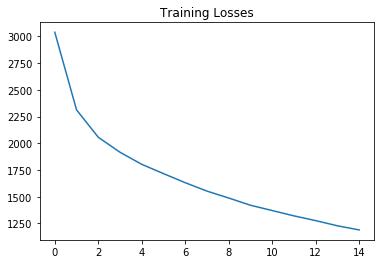

In [0]:
# plot dos resultados
plt.plot(train_accuracy_list, label='')
plt.title("Training Accuracy")
plt.show()

plt.plot(running_losses_list, label='')
plt.title("Training Losses")
plt.show()


In [0]:
test_losses = []
test_accuracies = []
y_true = []
y_pred = []
correct = 0
total = 0

model.eval()

with torch.no_grad():
    for images, labels in test_loader:
        # to do

# to do

print('Epochs: {} \t Train Loss: {:.4f} \t Test Loss: {:.4f} \t Test Accuracy: {:.2f}'\
     .format(epoch+1, np.mean(train_losses), np.mean(test_losses), accuracy))

Epochs: 15 	 Train Loss: 1.0799 	 Test Loss: 1.1611 	 Test Accuracy: 0.61


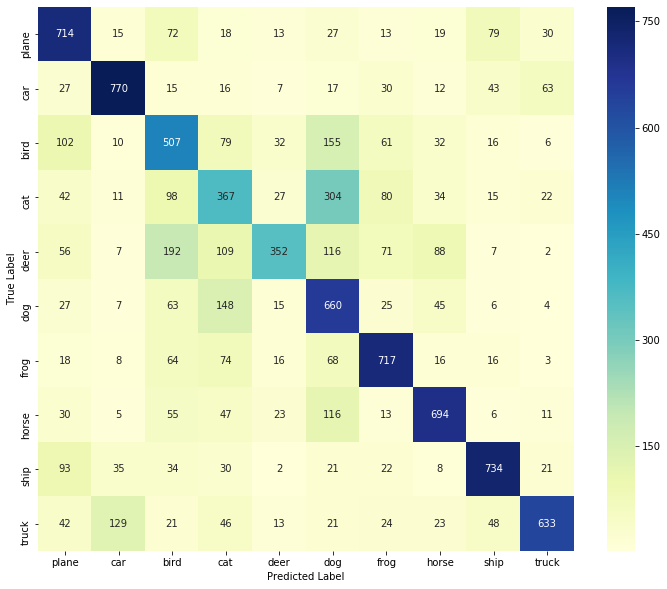

In [0]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)

plt.figure(figsize=(12,10))
ax = sn.heatmap(df_cm, annot=True, cmap=plt.cm.YlGnBu, fmt='d')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()